In [1]:
import pandas as pd
import numpy as np
from bff_processor.data_tools import regex_select, get_files, make_df
from bff_processor.utils import time_func, hist2unc, linear, parabola, significance, power_func, apply_multiple_filters
from bff_processor.bff_meta import preselection, band_cut, isin, identity
from bff_processor.plotting_utils import produce_bff_hists, boost_plot, boost_plot2d, unc_plot
import boost_histogram as bh
import matplotlib.pyplot as plt
import mplhep as hep
hep.set_style(hep.style.CMS)

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    })

In [3]:
# get 2017 files
#era = 2016
era = 9999
#file_re = regex_select(era)
#print(file_re)
file_re = 'tw_(?:2017|2018).+\.csv'
file_dict = get_files(file_re)

In [4]:
file_dict

{'DY': ['data/tw_2018_ZToMuMu_M_50_120.csv',
  'data/tw_2017_ZToEE_M_50_120.csv',
  'data/tw_2017_ZToEE_M_200_400.csv',
  'data/tw_2017_ZToEE_M_120_200.csv',
  'data/tw_2017_ZToMuMu_M_400_800.csv',
  'data/tw_2018_ZToMuMu_M_200_400.csv',
  'data/tw_2017_ZToMuMu_M_200_400.csv',
  'data/tw_2018_ZToEE_M_200_400.csv',
  'data/tw_2018_ZToEE_M_800_1400.csv',
  'data/tw_2017_ZToEE_M_800_1400.csv',
  'data/tw_2018_ZToEE_M_50_120.csv',
  'data/tw_2018_ZToEE_M_120_200.csv',
  'data/tw_2018_ZToMuMu_M_120_200.csv',
  'data/tw_2017_ZToMuMu_M_800_1400.csv',
  'data/tw_2017_ZToMuMu_M_50_120.csv',
  'data/tw_2017_ZToEE_M_400_800.csv',
  'data/tw_2018_ZToEE_M_400_800.csv',
  'data/tw_2017_ZToMuMu_M_120_200.csv'],
 'ST': ['data/tw_2017_mc_santitop.csv',
  'data/tw_2017_mc_stop.csv',
  'data/tw_2018_mc_santitop.csv',
  'data/tw_2018_mc_stop.csv'],
 'VB': ['data/tw_2017_mc_wz.csv',
  'data/tw_2017_mc_ww.csv',
  'data/tw_2017_mc_zz.csv'],
 'TT': ['data/tw_2018_mc_ttbar.csv', 'data/tw_2017_mc_ttbar.csv'],
 

In [5]:
#make df of background
backgrounds = file_dict['DY']+file_dict['TT']+file_dict['ST']+file_dict['VB']
background_df = preselection()(make_df(backgrounds))

In [6]:
#make df of signals
import re
bff_dict = {}
for fname in file_dict['BFF']:
    #print(fname)
    name = re.findall('_M_([0-9]+)_dbs(\d)p(\d+)', fname)[0]
    name = "{} {}.{}".format(*name)
    #print(name)
    if name not in bff_dict:
        bff_dict[name] = []
    bff_dict[name].append(fname)
for name, item in bff_dict.items():
    if len(item) != 2: continue
    print(item)
    bff_dict[name] = preselection()(make_df(item))
bff_samples = ['125 0.04', '150 0.04', '200 0.04','250 0.04', '300 0.04', '350 0.04','400 0.04','450 0.04','500 0.04']
bff_dict.keys()

['data/tw_2017_BFFZprimeToMuMu_M_400_dbs0p04.csv', 'data/tw_2018_BFFZprimeToMuMu_M_400_dbs0p04.csv']
['data/tw_2018_BFFZprimeToMuMu_M_300_dbs0p04.csv', 'data/tw_2017_BFFZprimeToMuMu_M_300_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_350_dbs0p5.csv', 'data/tw_2018_BFFZprimeToMuMu_M_350_dbs0p5.csv']
['data/tw_2017_BFFZprimeToMuMu_M_450_dbs0p04.csv', 'data/tw_2018_BFFZprimeToMuMu_M_450_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_125_dbs0p04.csv', 'data/tw_2018_BFFZprimeToMuMu_M_125_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_500_dbs0p04.csv', 'data/tw_2018_BFFZprimeToMuMu_M_500_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_200_dbs1p0.csv', 'data/tw_2018_BFFZprimeToMuMu_M_200_dbs1p0.csv']
['data/tw_2018_BFFZprimeToMuMu_M_175_dbs0p04.csv', 'data/tw_2017_BFFZprimeToMuMu_M_175_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_350_dbs0p04.csv', 'data/tw_2018_BFFZprimeToMuMu_M_350_dbs0p04.csv']
['data/tw_2018_BFFZprimeToMuMu_M_350_dbs1p0.csv', 'data/tw_2017_BFFZprimeToMuMu_M_350_dbs1p0.cs

dict_keys(['400 0.04', '300 0.04', '350 0.5', '450 0.04', '125 0.04', '500 0.04', '200 1.0', '175 0.04', '350 0.04', '350 1.0', '500 0.5', '250 0.04', '150 0.04', '500 1.0', '200 0.5', '200 0.04'])

In [7]:
columns = [
    ['DiLepMass', [139,105,800]],
    ['TMB_nom',       [80,0, 800]],
    ['HTLT_nom',      [100,-500,500]],
    ['RelMET_nom',    [100, 0,1]]
]

In [8]:
#optimize RelMET cut:
def column_1d_sig(sig_df, bck_df, mass_band=1, filter_func=lambda x: x):
    #select for region
    _sig_df = filter_func(sig_df)
    _bck_df =  filter_func(bck_df)
    mean, std = sig_df['DiLepMass'].mean(), sig_df['DiLepMass'].std()
    widht = std*mass_band
    #mass band cut
    _sig_df = band_cut('DiLepMass',mean-widht, mean+widht)(_sig_df)
    _bck_df = band_cut('DiLepMass',mean-widht, mean+widht)(_bck_df)
    bck_1d_hist, bck_2d_hist = produce_bff_hists(_bck_df, "", columns, weight='Weight')
    sig_1d_hist, sig_2d_hist = produce_bff_hists(_sig_df, "", columns, weight='Weight')
    return bck_1d_hist, sig_1d_hist, bck_2d_hist, sig_2d_hist

In [9]:
def calc_sig_cut(s,b, direction=1):
    from itertools import accumulate
    s,b = np.array(list(accumulate(s[::direction])))[::direction], np.array(list(accumulate(b[::direction])))[::direction]
    return significance(s,b)

In [10]:
from scipy.stats import norm
def map_signf(value, signf, centers):
    diff = np.abs(centers - value)
    delta  = (centers[1] - centers[0])
    weight = norm.pdf(diff, loc=0, scale=delta*1)
    wval = np.dot(signf,weight)/np.sum(weight+1e-12)
    return wval.nominal_value


In [11]:
def linear_sig(masses, sigs, centers, *popt):
    signfs = []
    for m, sig in zip(masses,sigs):
        cut_val = linear(m,*popt)
        signf = map_signf(cut_val, sig, centers)
        signfs.append(signf+1e-12)
    return np.dot(-np.array(signfs), np.power(masses, 0))

In [12]:
def fit_sig(masses, sigs, centers, fit_function, *popt):
    signfs = []
    for m, sig in zip(masses,sigs):
        cut_val = fit_function(m,*popt)
        signf = map_signf(cut_val, sig, centers)
        signfs.append(signf+1e-12)
    return np.dot(-np.array(signfs), np.power(masses, 0))

In [13]:
from scipy.optimize import curve_fit, minimize, differential_evolution
from bff_processor.utils import vunc2nom, vunc2std
import uncertainties

In [14]:
def plot_opt_sig(column,bff_dict, background_df, func2fit, fit=False, filter_func=lambda x: x, postfix="",direction=1, p0=[0,.5], title_size=20):
    fig,ax = plt.subplots(2,len(bff_samples), figsize=[38,15])
    fit_x = []
    fit_y = []
    fit_y_unc = []
    sigs = []
    masses = []
    for j, m in enumerate(bff_samples):
        mass = int(re.findall('([0-9]+)',m)[0])
        bck_1d_hist, sig_1d_hist, bck_2d_hist, sig_2d_hist = column_1d_sig(bff_dict[m], background_df, mass_band=2,filter_func=filter_func)
        
        top_ax = ax[0,j]
        top_ax.set_xlabel(column.replace('_',' '))
        boost_plot(top_ax, bck_1d_hist[column] ,label='bck')
        boost_plot(top_ax, sig_1d_hist[column] ,label='sig')
        title = r'{} GeV $\delta_{{bs}}$ {}'.format(*m.split(' '))
        top_ax.set_title(title, fontsize=title_size)
        
        
        top_ax.legend()
        
        s,b = hist2unc(sig_1d_hist[column]), hist2unc(bck_1d_hist[column])
        signf_val = calc_sig_cut(s,b, direction=direction)
        
        centers = sig_1d_hist[column].axes[0].centers
        unc_plot(ax[1][j], signf_val,centers, zorder=1)
        peak_index = np.argmax(signf_val)
        peak_center = centers[peak_index]
        peak_height = signf_val[peak_index]
        
        sigs.append(signf_val)
        masses.append(mass)
        
        if fit:
                lims = (peak_index-5,peak_index+5)
                c_band = centers[lims[0]:lims[1]]
                nom_band = vunc2nom(signf_val)[lims[0]:lims[1]]
                std_band = vunc2std(signf_val)[lims[0]:lims[1]]
                popt, pcov = curve_fit(parabola,c_band, nom_band, sigma=std_band, absolute_sigma=True)
                corr_values = uncertainties.correlated_values(popt,pcov)
                ax[1][j].plot(c_band,parabola(c_band,*popt), zorder=2)
                peak_center = popt[0]
                peak_height = popt[1]
            
        #uncertainty of center
        upper_limit = vunc2nom(signf_val)+vunc2std(signf_val)
        in_range = centers[upper_limit > peak_height]
        sigma_range = np.asarray((in_range[0], in_range[-1]))
        unc = np.max(np.abs(sigma_range-peak_center))
        fit_x.append(mass)
        fit_y.append(peak_center)
        fit_y_unc.append(unc)
        
        ax[1][j].set_title("max: {:.2f}+/-{:.2f}".format(peak_center, unc), fontsize=title_size)
    
    ax[0][0].set_ylabel('Counts')
    ax[1][0].set_ylabel(r'Significance $\frac{s}{\sqrt{s+b}}$')
    
    fit_func = lambda popt: fit_sig(masses, sigs, centers, func2fit, *popt)
    min_val = minimize(fit_func, p0)
    #min_val = differential_evolution(fit_func, bounds=[(300,350), (-1.5, -1)])
    print(min_val)
    popt = min_val.x
    masses = np.array(masses)
    #cut_points = linear(masses, *popt)
    cut_points = func2fit(masses, *popt)
    
    for j, (m, c, s) in enumerate(zip(masses, cut_points, sigs)):
        sig_at_cut = map_signf(c, s, centers)
        print(sig_at_cut, c)
        #ax[1][j].plot([c,c], [0,sig_at_cut], zorder=1)
        ax[1][j].scatter([c], [sig_at_cut], zorder=1,s=150, c='red', marker=(5, 1), label='cut loc.')
        ax[1][j].legend(loc=4)
    fig.savefig("output/sig_tuning/{}_{}_{}.pdf".format(era, column, postfix), transparent=False)
    return popt
    
    #return popt
        #break

      fun: -192.60615134521356
 hess_inv: array([[ 3.64714790e+05, -2.36671271e+02],
       [-2.36671271e+02,  1.53729265e-01]])
      jac: array([ 0.0000000e+00, -5.7220459e-06])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 31
     njev: 40
   status: 0
  success: True
        x: array([289.85498048,  -1.28169048])
43.65948330081415 0.5951016595654143
48.726025778990156 0.47109154741741344
34.51103832152481 0.32581608611635504
22.284254806637396 0.24477320875020794
14.94205381780248 0.19376620418210402
10.51062334247118 0.1590277698418752
7.612190767311507 0.13401247934575447
5.7793717154074 0.11523477042116541
4.581109494245506 0.10067846855884473
      fun: -77.09097454766186
 hess_inv: array([[ 2.87932696e+02, -5.97894335e-01],
       [-5.97894335e-01,  1.79349462e-03]])
      jac: array([0.00000000e+00, 8.39233398e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 41
     njev: 88
   status: 2


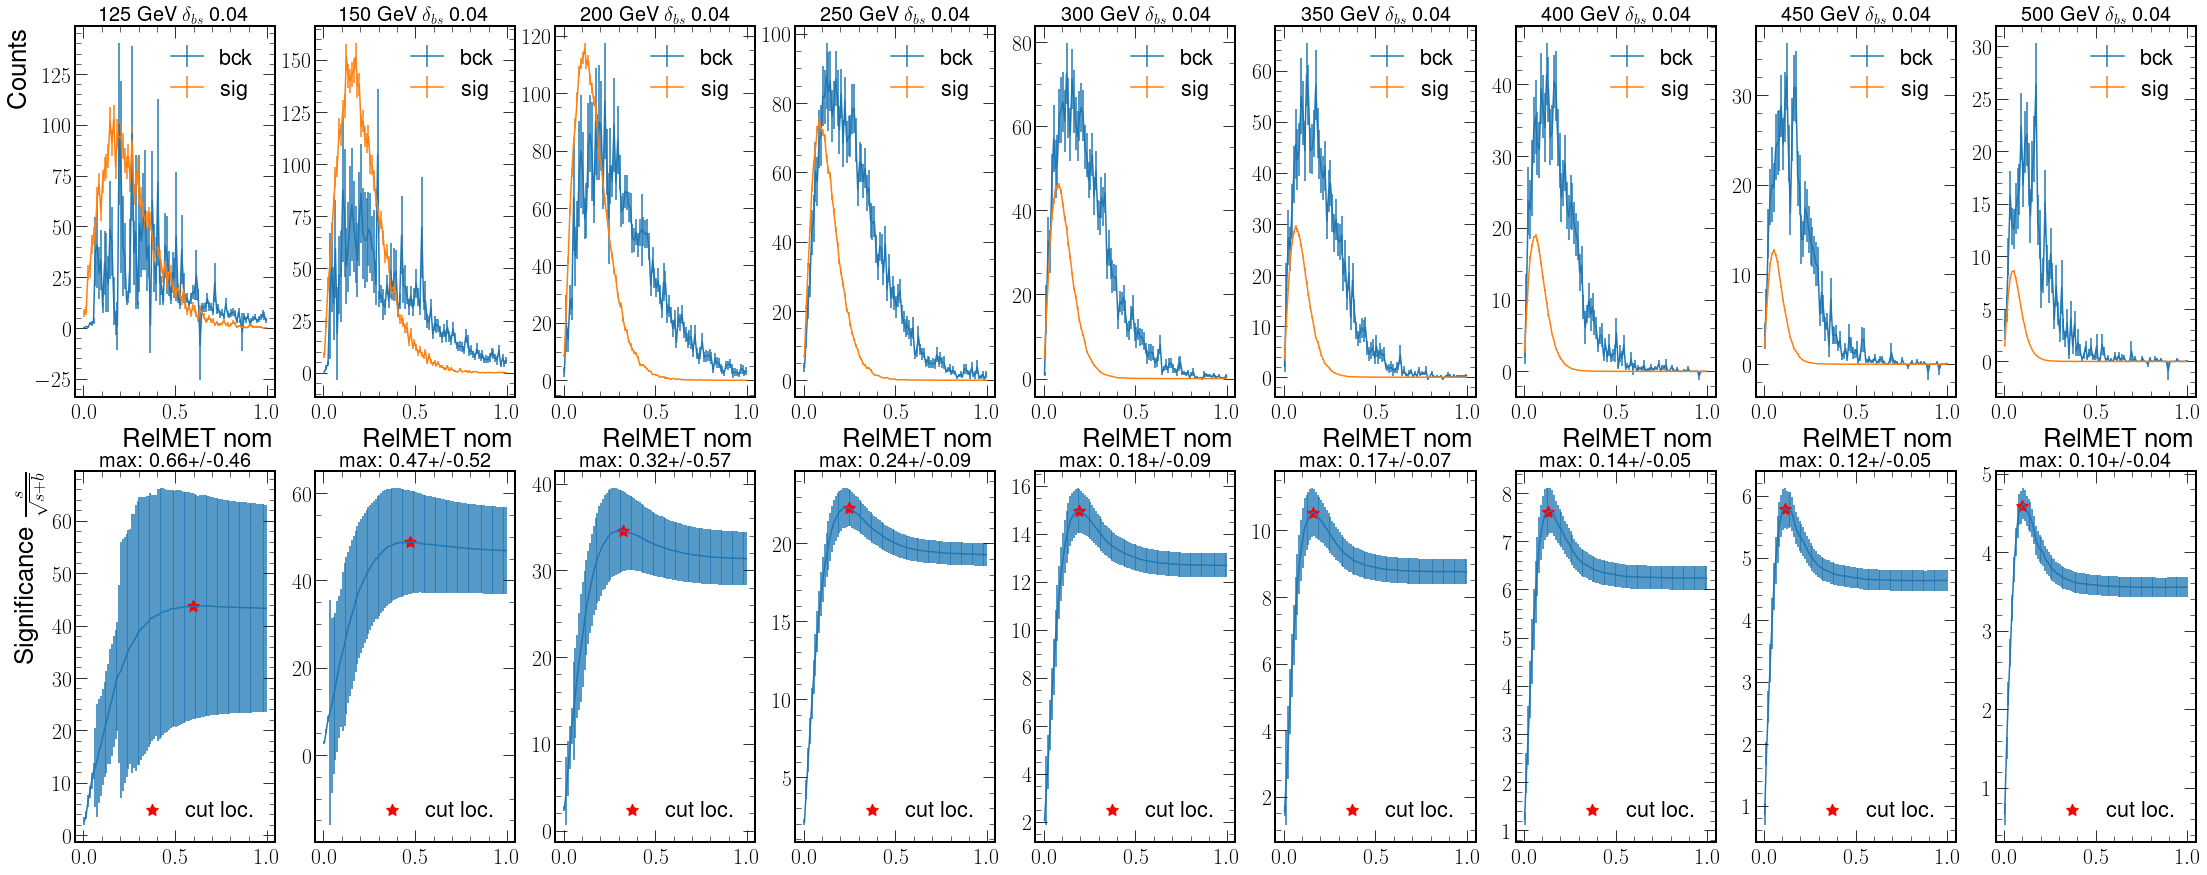

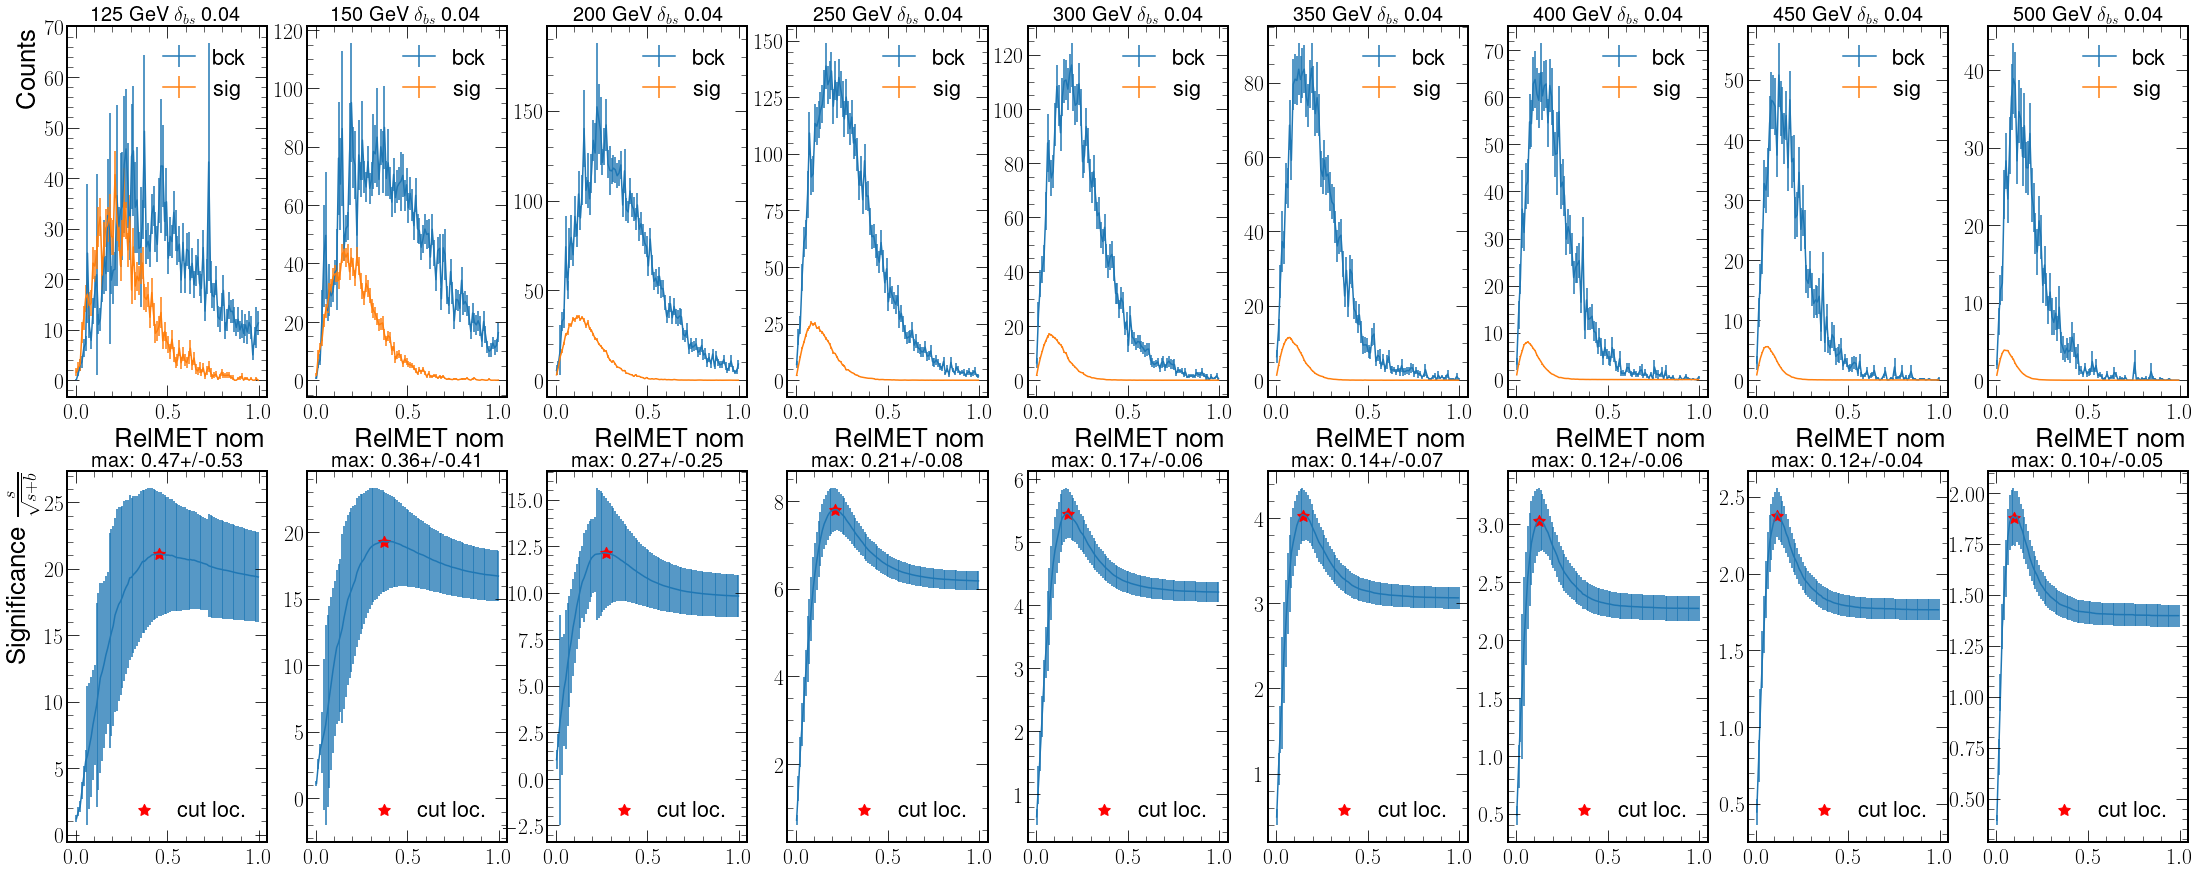

In [15]:
popt_relmet_1  = plot_opt_sig('RelMET_nom',bff_dict, background_df, power_func, filter_func=isin('SR1_nom'), postfix='_one_jet', p0=[300,-1.33])
popt_relmet_2  = plot_opt_sig('RelMET_nom',bff_dict, background_df, power_func, filter_func=isin('SR2_nom'), postfix='_two_jet', p0=[300,-1.2])

In [16]:
def band_cut2d(column1, column2, function, low=[0,-np.inf], high=[0,np.inf]):
    import pandas as pd 
    def cut_df(df):
        return df[(function(df[column1],*low) < df[column2]) & (function(df[column1],*high) > df[column2])]
    return cut_df    

In [35]:
def replace_bf_metadata(bf_dict, name1, name2):
    for reg in bf_dict:
        bf_dict[reg].axes[0].metadata = name1
        bf_dict[reg].axes[1].metadata = name2
    return bf_dict

def visualize_2d(col2, bff_dict, background_df, name='', filter_func=lambda x: x, title_size=20,**kwargs):
    '''This wont work if the plot producer doesn't ahve the right format'''
    col1= 'DiLepMass'
    test_cut_bck = filter_func(background_df)
    _, test_2d = produce_bff_hists(test_cut_bck, name, columns, weight='Weight')
    test_2d =  replace_bf_metadata(test_2d, col1, col2.replace('_',' '))
    
    sig_plts = {}
    for m in bff_samples:
        test_cut_sig = filter_func(bff_dict[m])
        _, test_2d_sig = produce_bff_hists(test_cut_sig, name, columns, weight='Weight')
        test_2d_sig =  replace_bf_metadata(test_2d_sig, col1, col2.replace('_',' '))
        sig_plts[m] = test_2d_sig
        
    fig,ax = plt.subplots(1,1+len(sig_plts), figsize=[38,7])
    boost_plot2d(ax[0], test_2d['{}_{}'.format(col1,col2)],log=1)
    ax[0].set_title('background')
    for i, (m,tdict) in enumerate(sig_plts.items()):
        boost_plot2d(ax[i+1], tdict['{}_{}'.format(col1,col2)],log=1)
        ax[i+1].set_ylabel('')
        ax[i+1].set_title(r'{} GeV $\delta_{{bs}}$ {}'.format(*m.split(' ')), fontsize=title_size)
    fig.savefig('output/sig_tuning/{}_{}_{}_2d.pdf'.format(name,col1,col2))

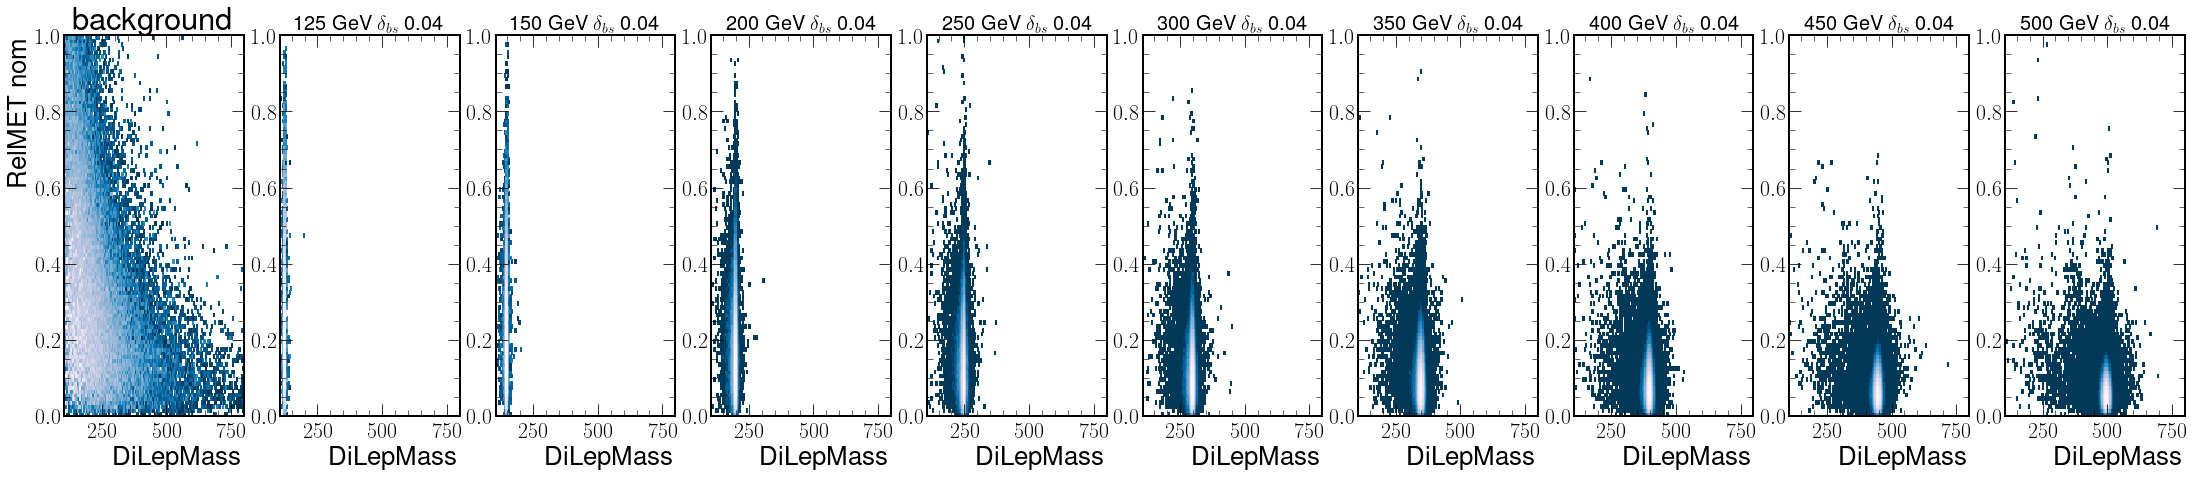

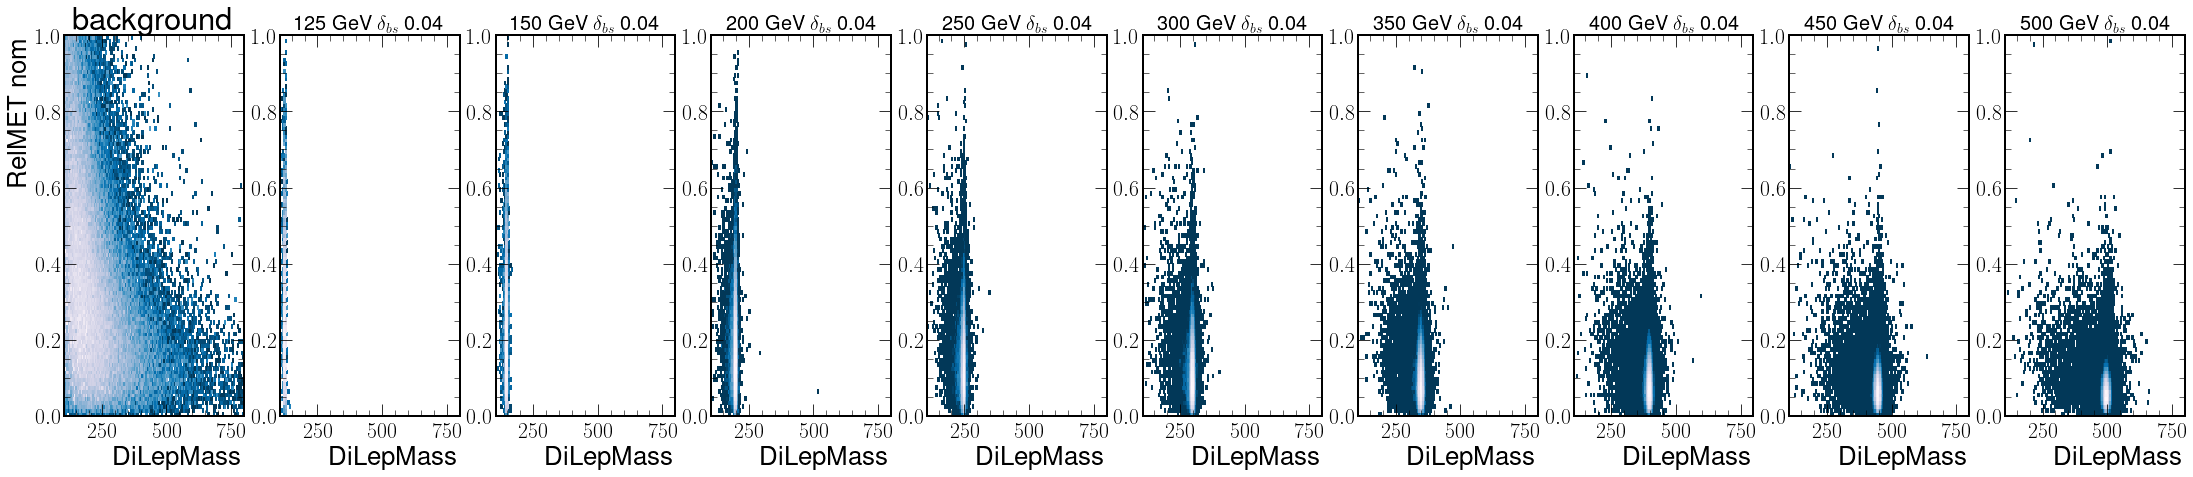

In [37]:
visualize_2d('RelMET_nom', bff_dict, background_df, name='oneJet_nocut', filter_func=isin('SR1_nom'))
visualize_2d('RelMET_nom', bff_dict, background_df, name='twoJet_nocut', filter_func=isin('SR2_nom'))

In [38]:
popt_relmet_1, popt_relmet_2

(array([289.85498048,  -1.28169048]), array([84.56518358, -1.08308897]))

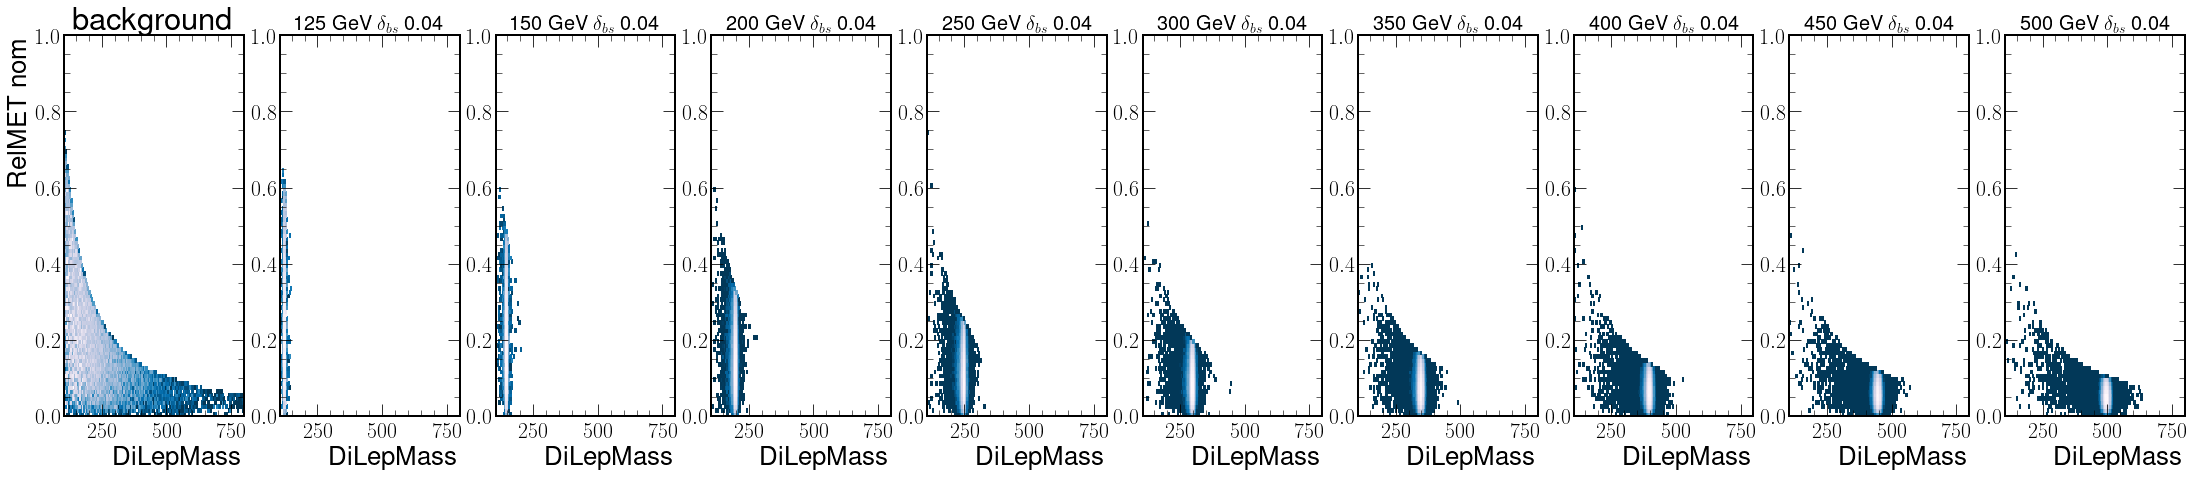

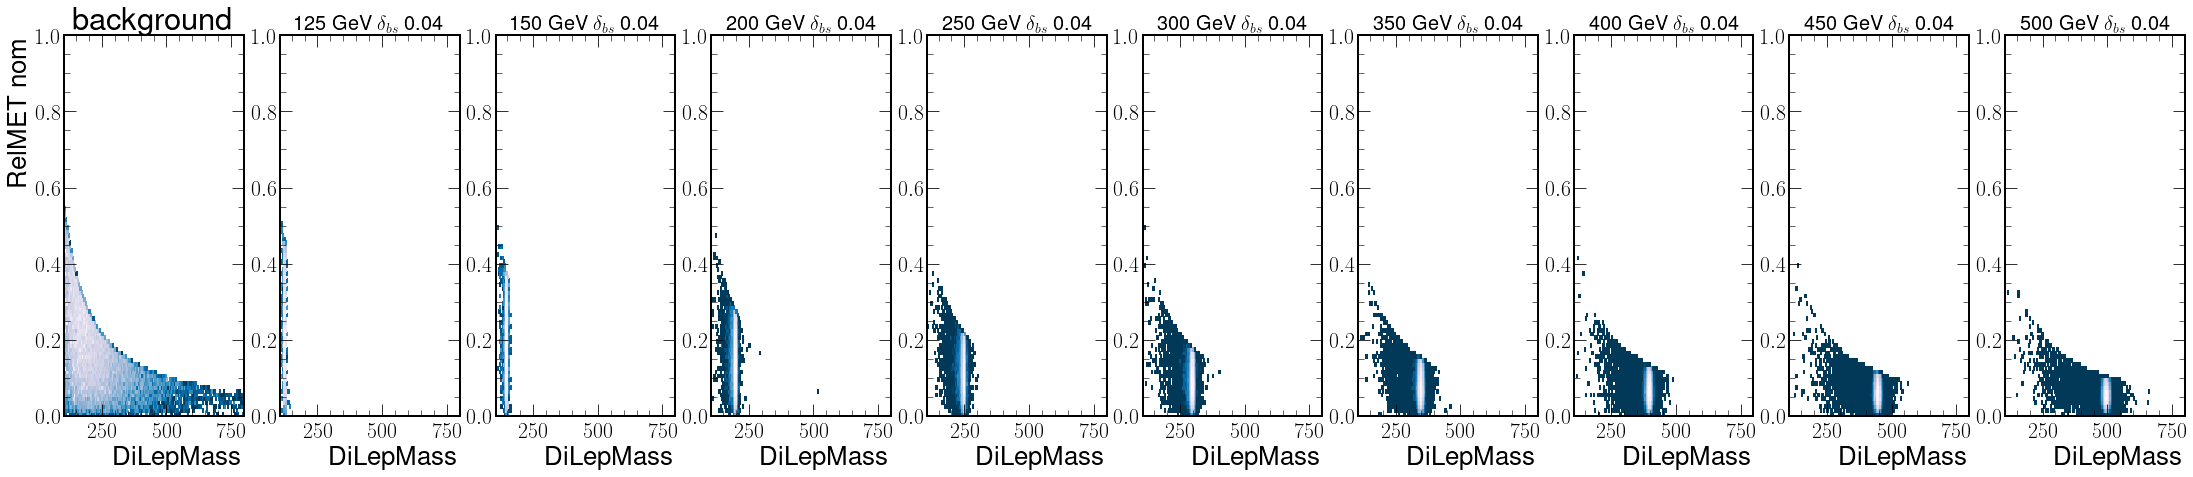

In [39]:
def RelMET_filter(df, col, *popt):
    return power_func(df.DiLepMass, *popt) > df[col]

RelMET_filter1 = lambda df, col: RelMET_filter(df, col, *popt_relmet_1)
RelMET_filter2 = lambda df, col: RelMET_filter(df, col, *popt_relmet_2)


RelMET_f1_SR1_nom = lambda df: apply_multiple_filters(df, [df.SR1_nom, RelMET_filter1(df, 'RelMET_nom')])
RelMET_f2_SR2_nom = lambda df: apply_multiple_filters(df, [df.SR2_nom, RelMET_filter2(df, 'RelMET_nom')])


visualize_2d('RelMET_nom', bff_dict, background_df, name='oneJet_cut', filter_func=RelMET_f1_SR1_nom)
visualize_2d('RelMET_nom', bff_dict, background_df, name='twoJet_cut', filter_func=RelMET_f2_SR2_nom)

      fun: -192.19770685213356
 hess_inv: array([[0.01472622, 0.00860837],
       [0.00860837, 0.47740882]])
      jac: array([5.72204590e-06, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 35
     njev: 55
   status: 0
  success: True
        x: array([ -0.99415756, 250.57977687])
43.60966003563804 126.31008154807888
48.68100165759818 101.45614248424062
34.444883684443404 51.74826435656411
22.09823540209525 2.04038622888757
14.733098795614685 -47.66749189878897
10.40309919311075 -97.37537002646548
7.60798932964475 -147.08324815414198
5.87233192842469 -196.79112628181855
4.747406825554783 -246.49900440949506
      fun: -77.53554902677176
 hess_inv: array([[ 3.31525503e-01, -1.62616325e+02],
       [-1.62616325e+02,  9.46369045e+04]])
      jac: array([8.58306885e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 213
      nit: 32
     njev: 71
   status: 0
  success: True
        x: array([ -1.20395516, 345

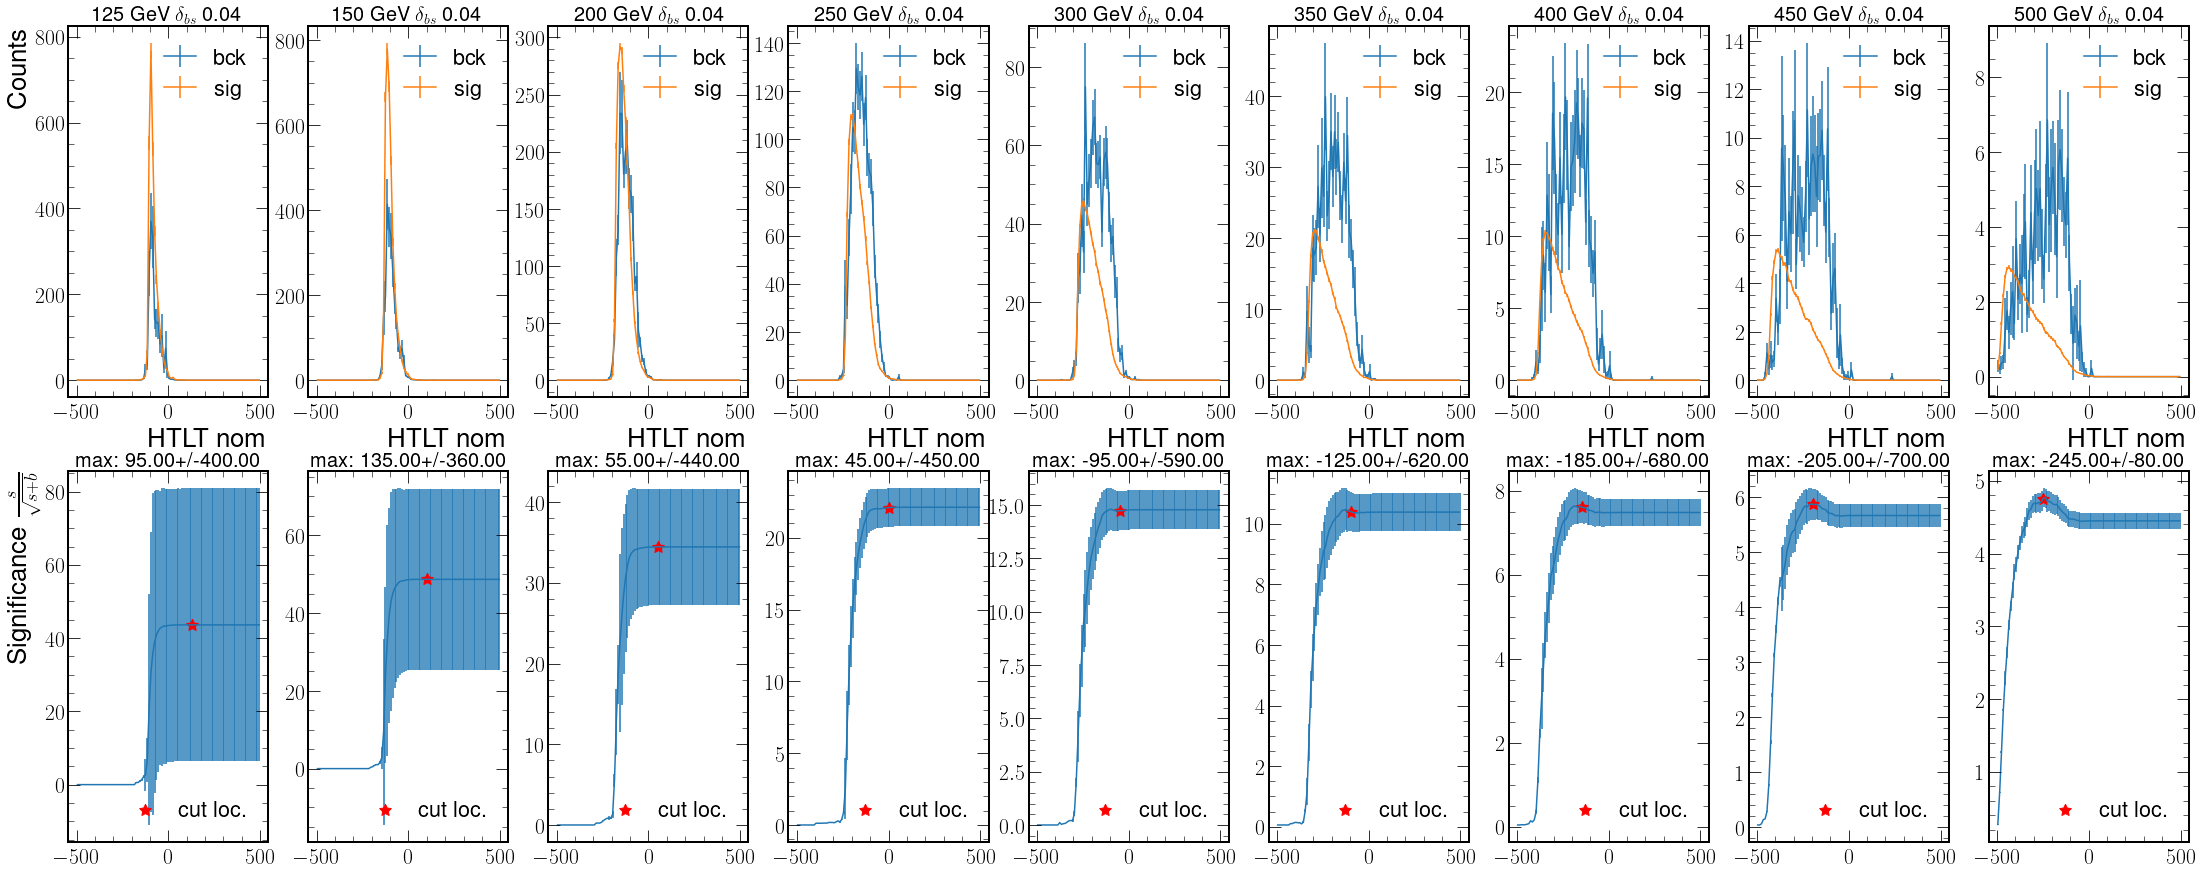

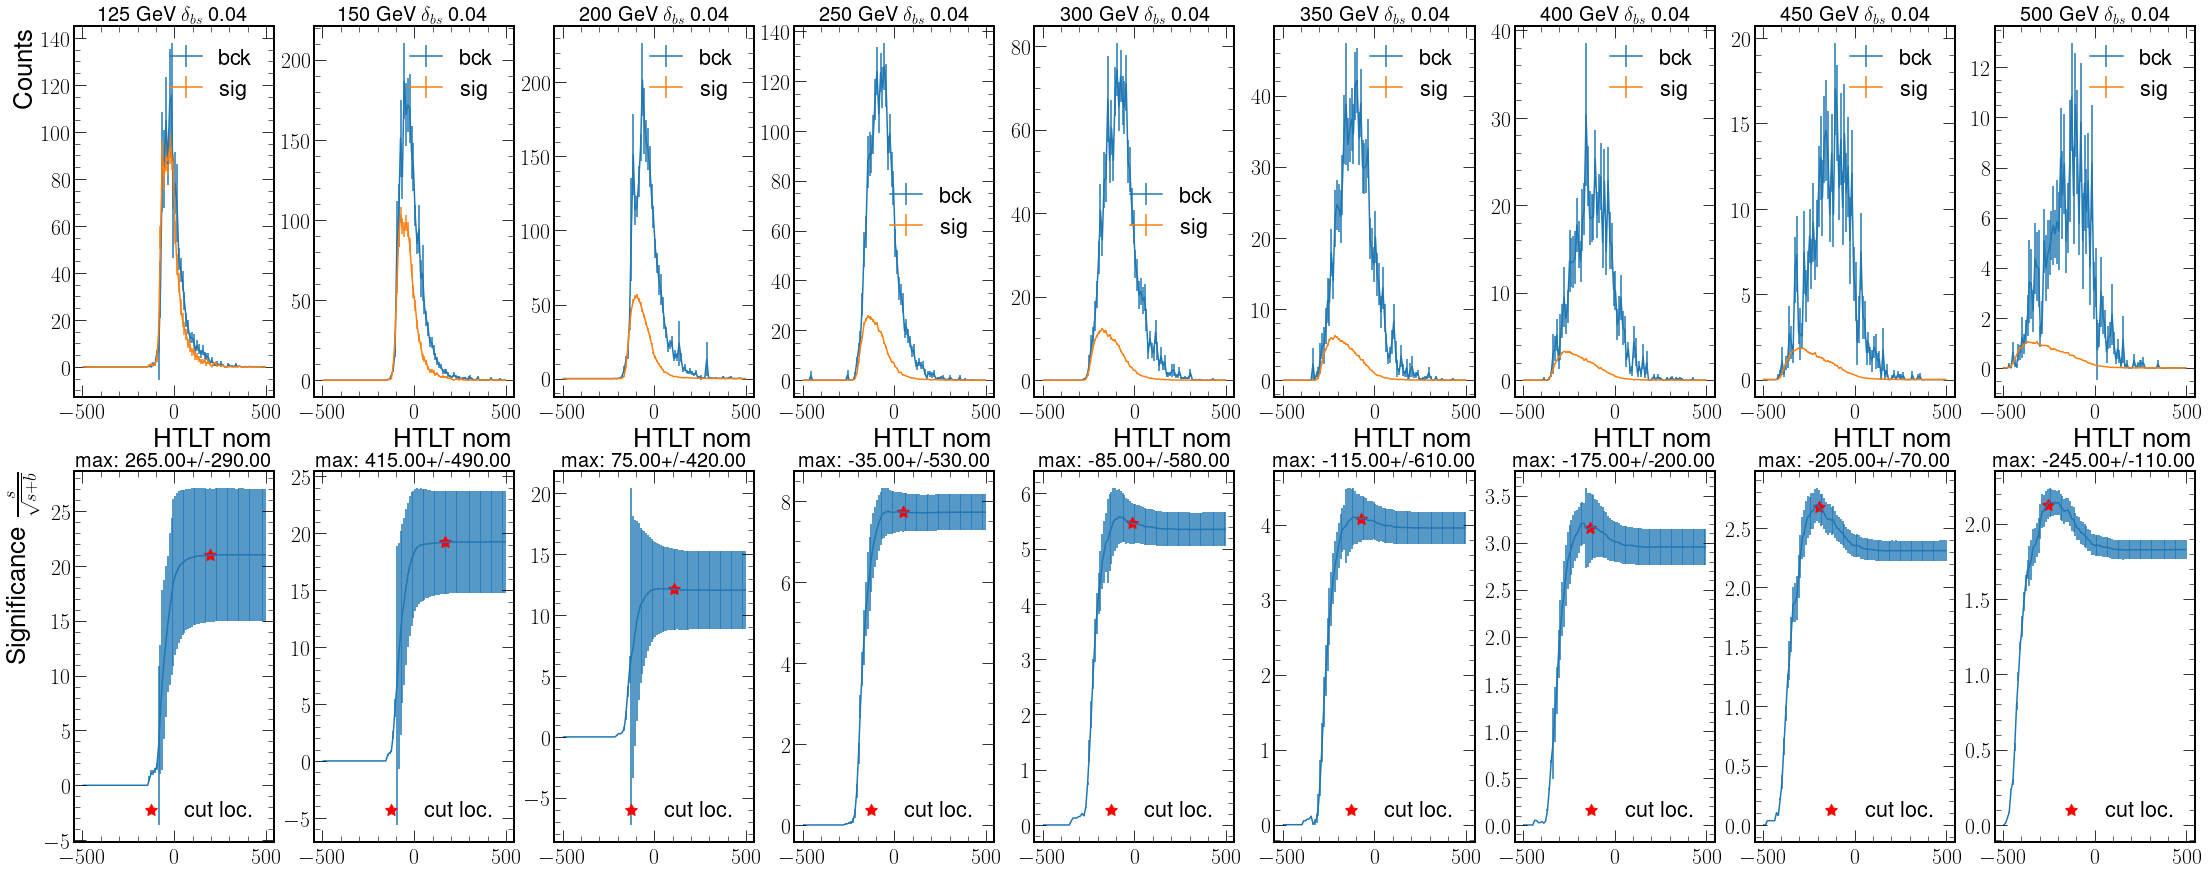

In [40]:
popt_htlt_1 = plot_opt_sig('HTLT_nom',bff_dict, background_df, linear, filter_func=RelMET_f1_SR1_nom, postfix='_one_jet', p0=[-1,300])
popt_htlt_2 = plot_opt_sig('HTLT_nom',bff_dict, background_df,linear, filter_func=RelMET_f2_SR2_nom, postfix='_two_jet')

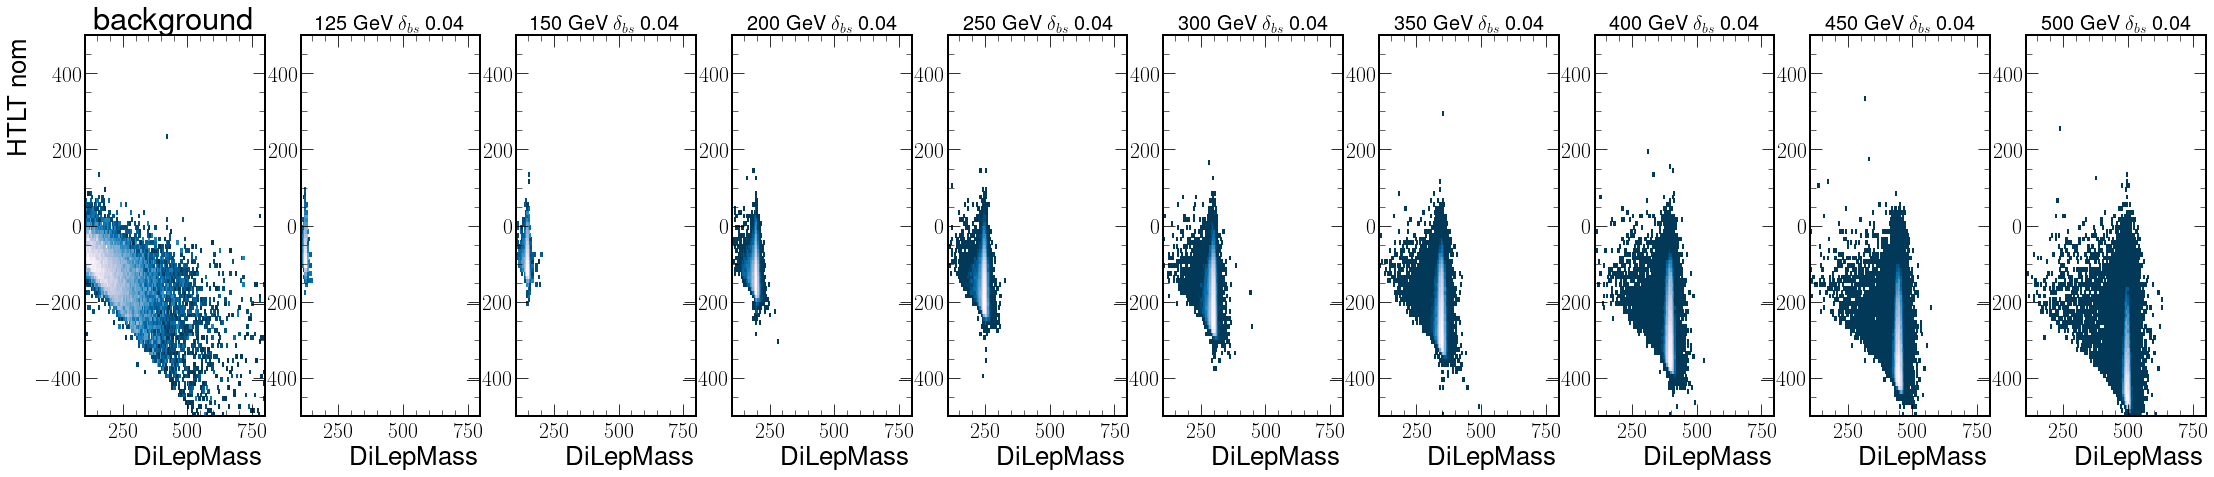

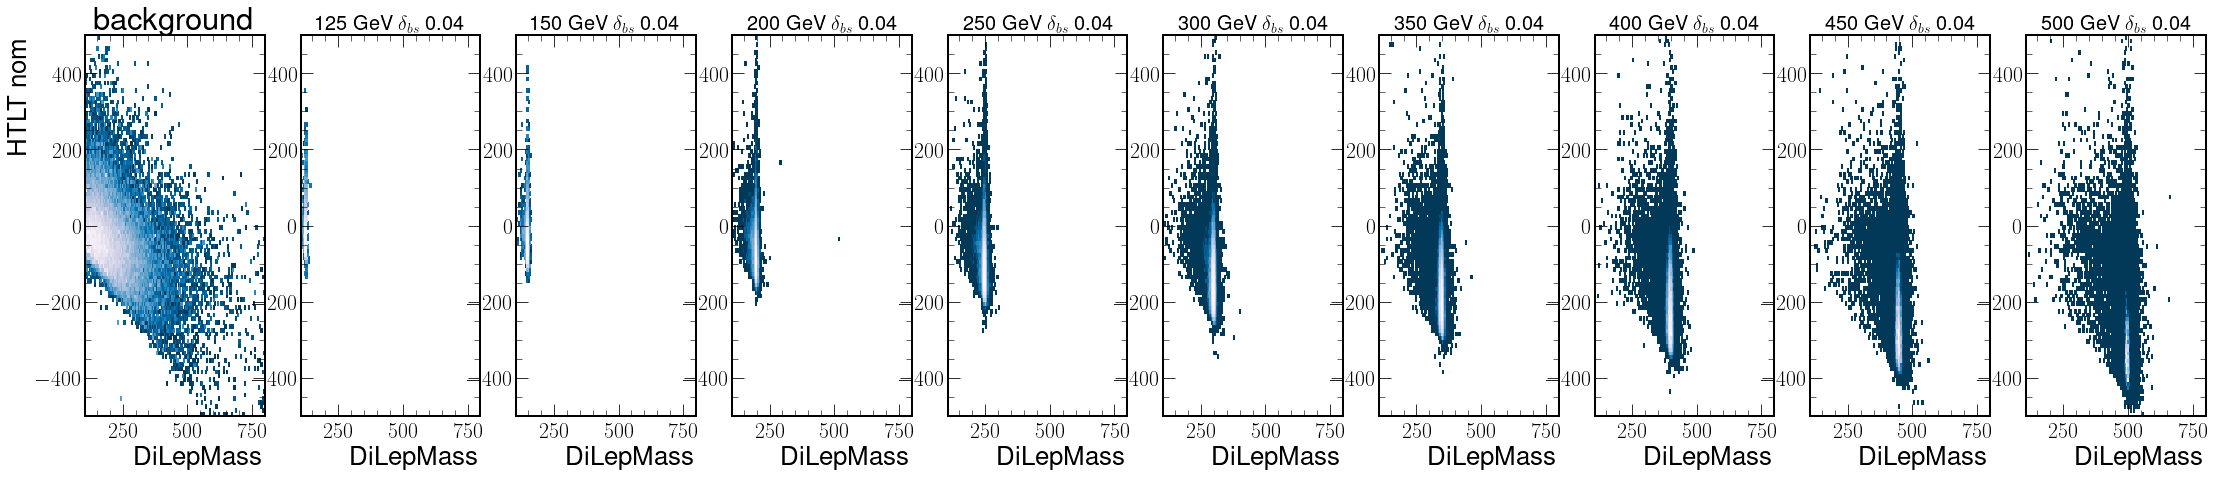

In [41]:
visualize_2d('HTLT_nom', bff_dict, background_df, name='oneJet_nocut', filter_func=RelMET_f1_SR1_nom)
visualize_2d('HTLT_nom', bff_dict, background_df, name='twoJet_nocut', filter_func=RelMET_f2_SR2_nom)

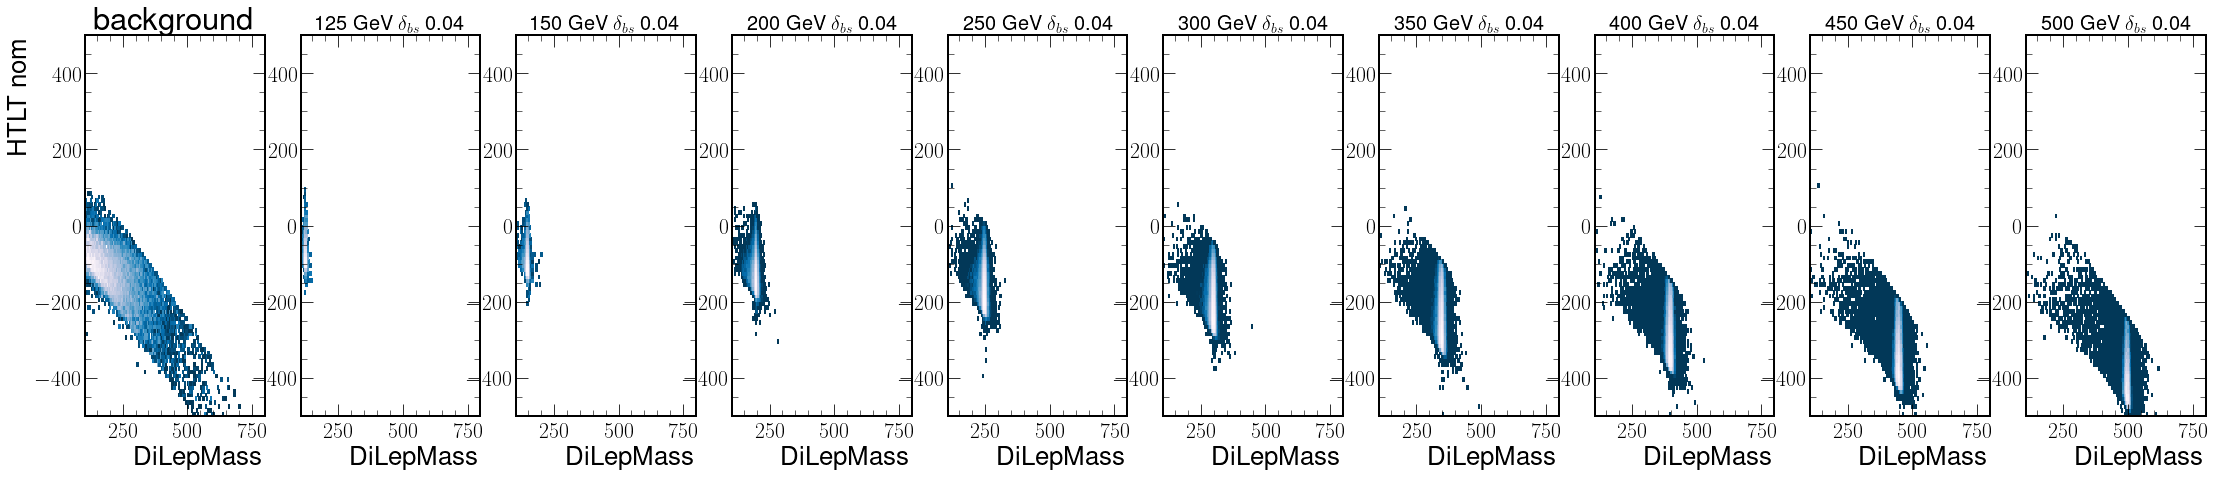

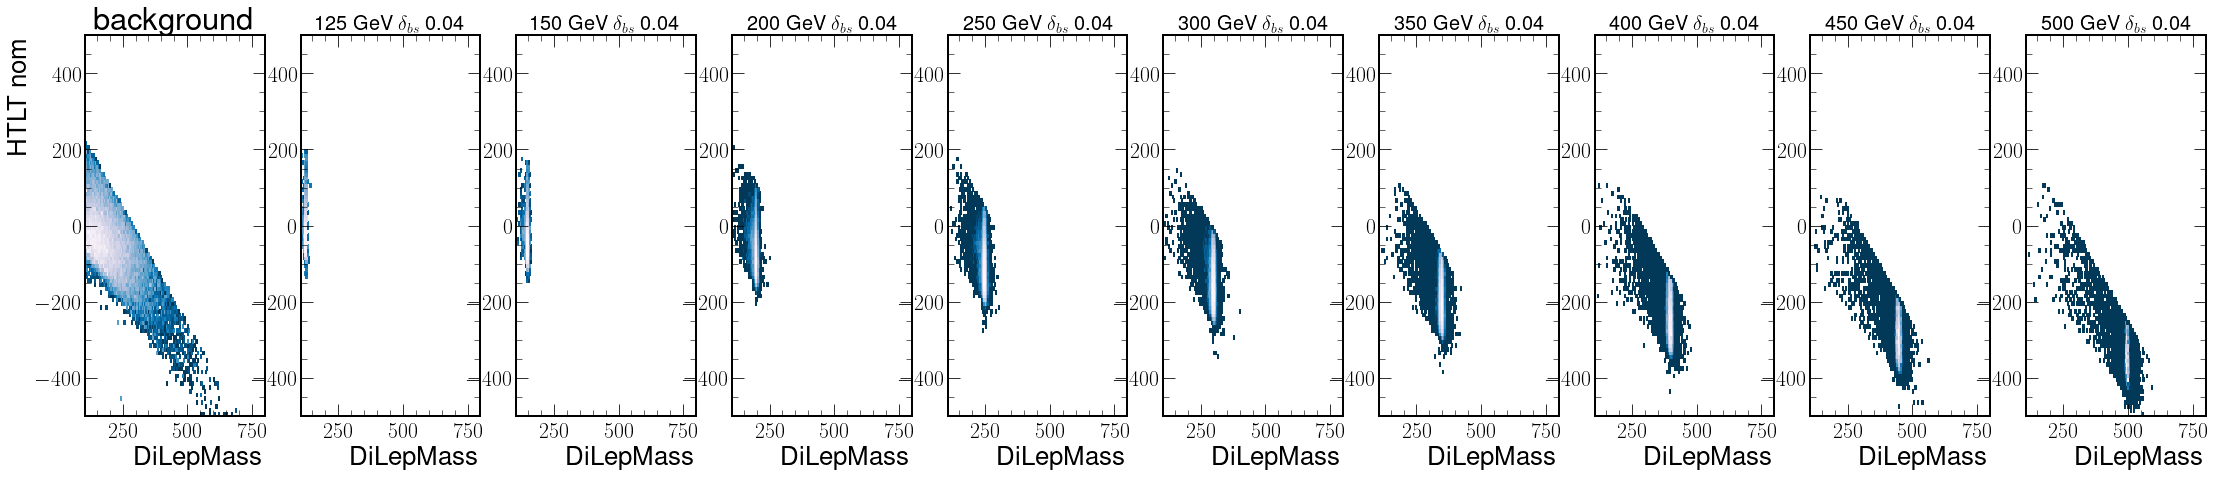

In [42]:
def HTLT_filter(df, col, *popt):
    return linear(df.DiLepMass, *popt) > df[col]

HTLT_filter1 = lambda df, col: HTLT_filter(df, col, *popt_htlt_1)
HTLT_filter2 = lambda df, col: HTLT_filter(df, col, *popt_htlt_2)


HTLT_f1_SR1_nom = lambda df: apply_multiple_filters(df, [df.SR1_nom, RelMET_filter1(df, 'RelMET_nom'), HTLT_filter1(df, 'HTLT_nom')])
HTLT_f2_SR2_nom = lambda df: apply_multiple_filters(df, [df.SR2_nom, RelMET_filter2(df, 'RelMET_nom'), HTLT_filter2(df, 'HTLT_nom')])

visualize_2d('HTLT_nom', bff_dict, background_df, name='oneJet_cut', filter_func=HTLT_f1_SR1_nom)
visualize_2d('HTLT_nom', bff_dict, background_df, name='twoJet_cut', filter_func=HTLT_f2_SR2_nom)

In [43]:
def heaviside(x, cutoff, scale):
    return np.heaviside(x-cutoff, 0)*scale

      fun: -191.59034194455836
 hess_inv: array([[1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.94176005e+05]])
      jac: array([0.00000000e+00, 9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 13
     njev: 20
   status: 0
  success: True
        x: array([300.        ,  -7.86672452])
43.60916793209148 -0.0
48.66839814329519 -0.0
34.43986047294325 -0.0
22.091646664677217 -0.0
14.736385122735614 -0.0
10.376736296316903 -7.866724523048218
7.454417513445363 -7.866724523048218
5.672357656082971 -7.866724523048218
4.5413721429613485 -7.866724523048218
      fun: -79.64599409314616
 hess_inv: array([[1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.23027207e+03]])
      jac: array([0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 2
     njev: 12
   status: 0
  success: True
        x: array([225.        , 157.29574477])
20.975802801343768 0.0
19.194139874627965 0.0

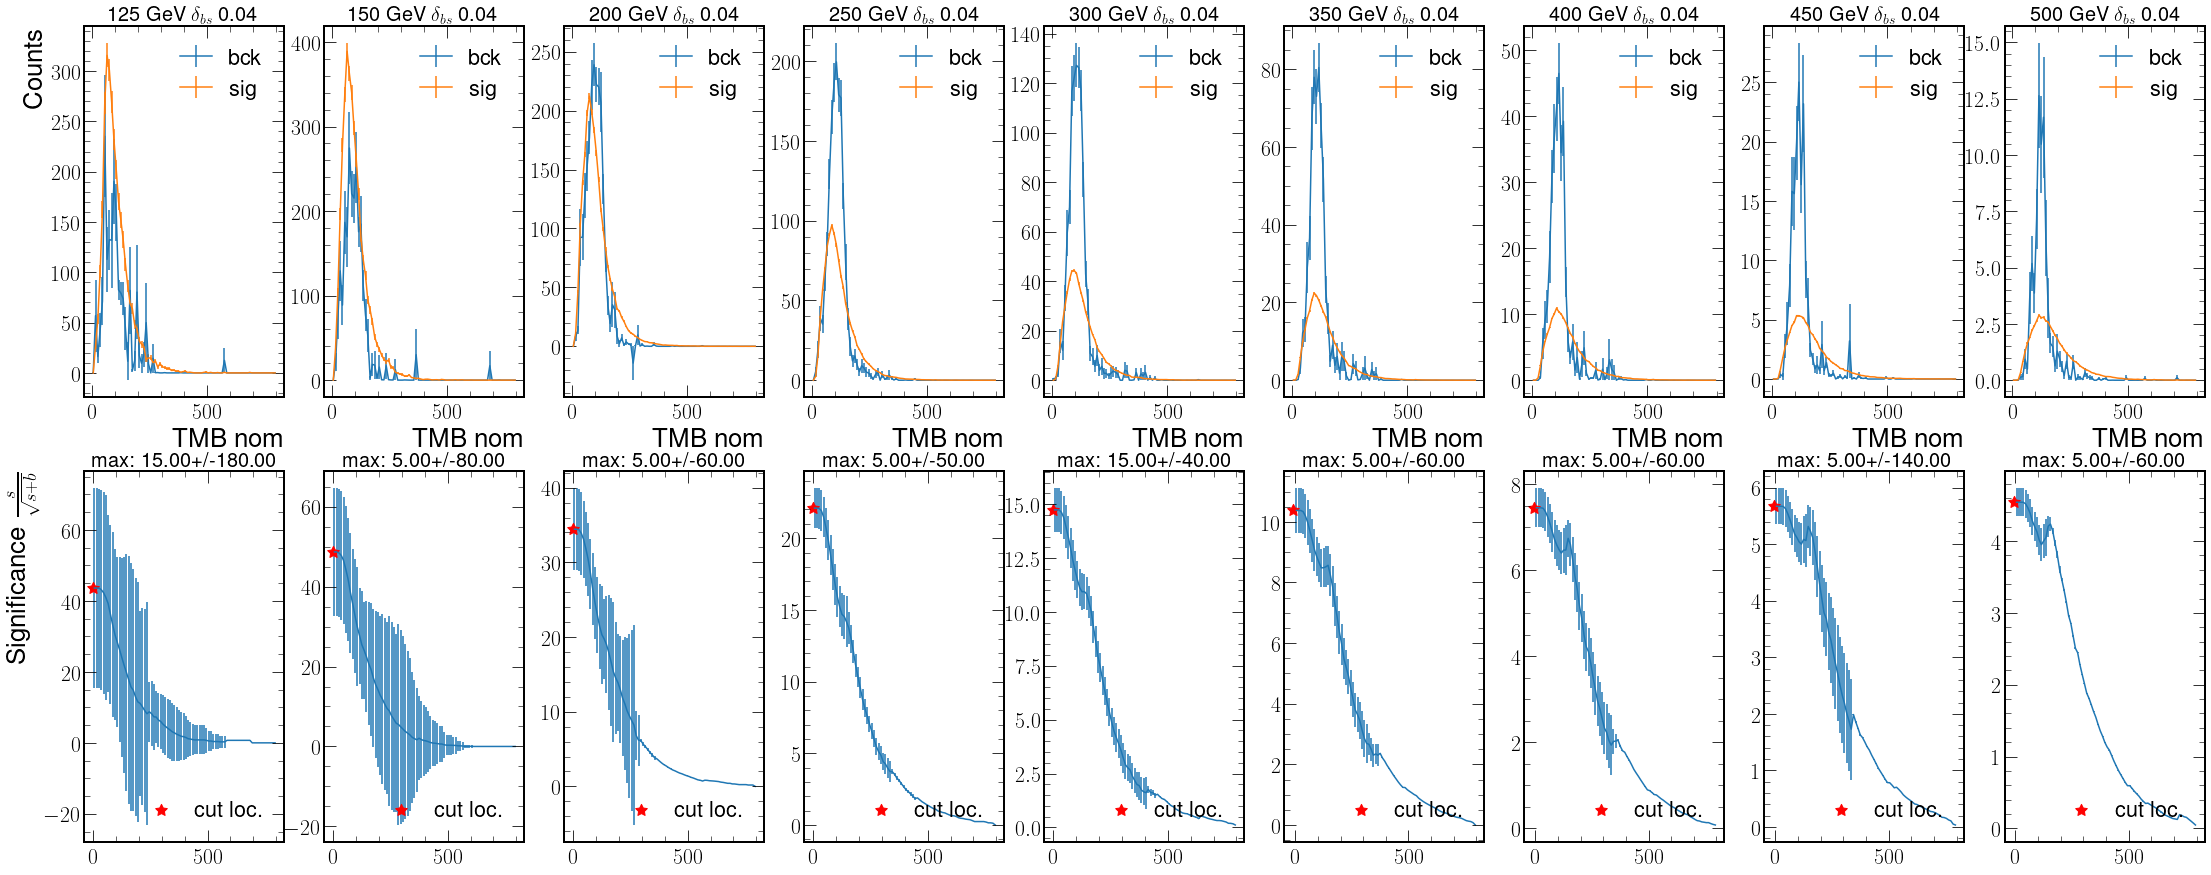

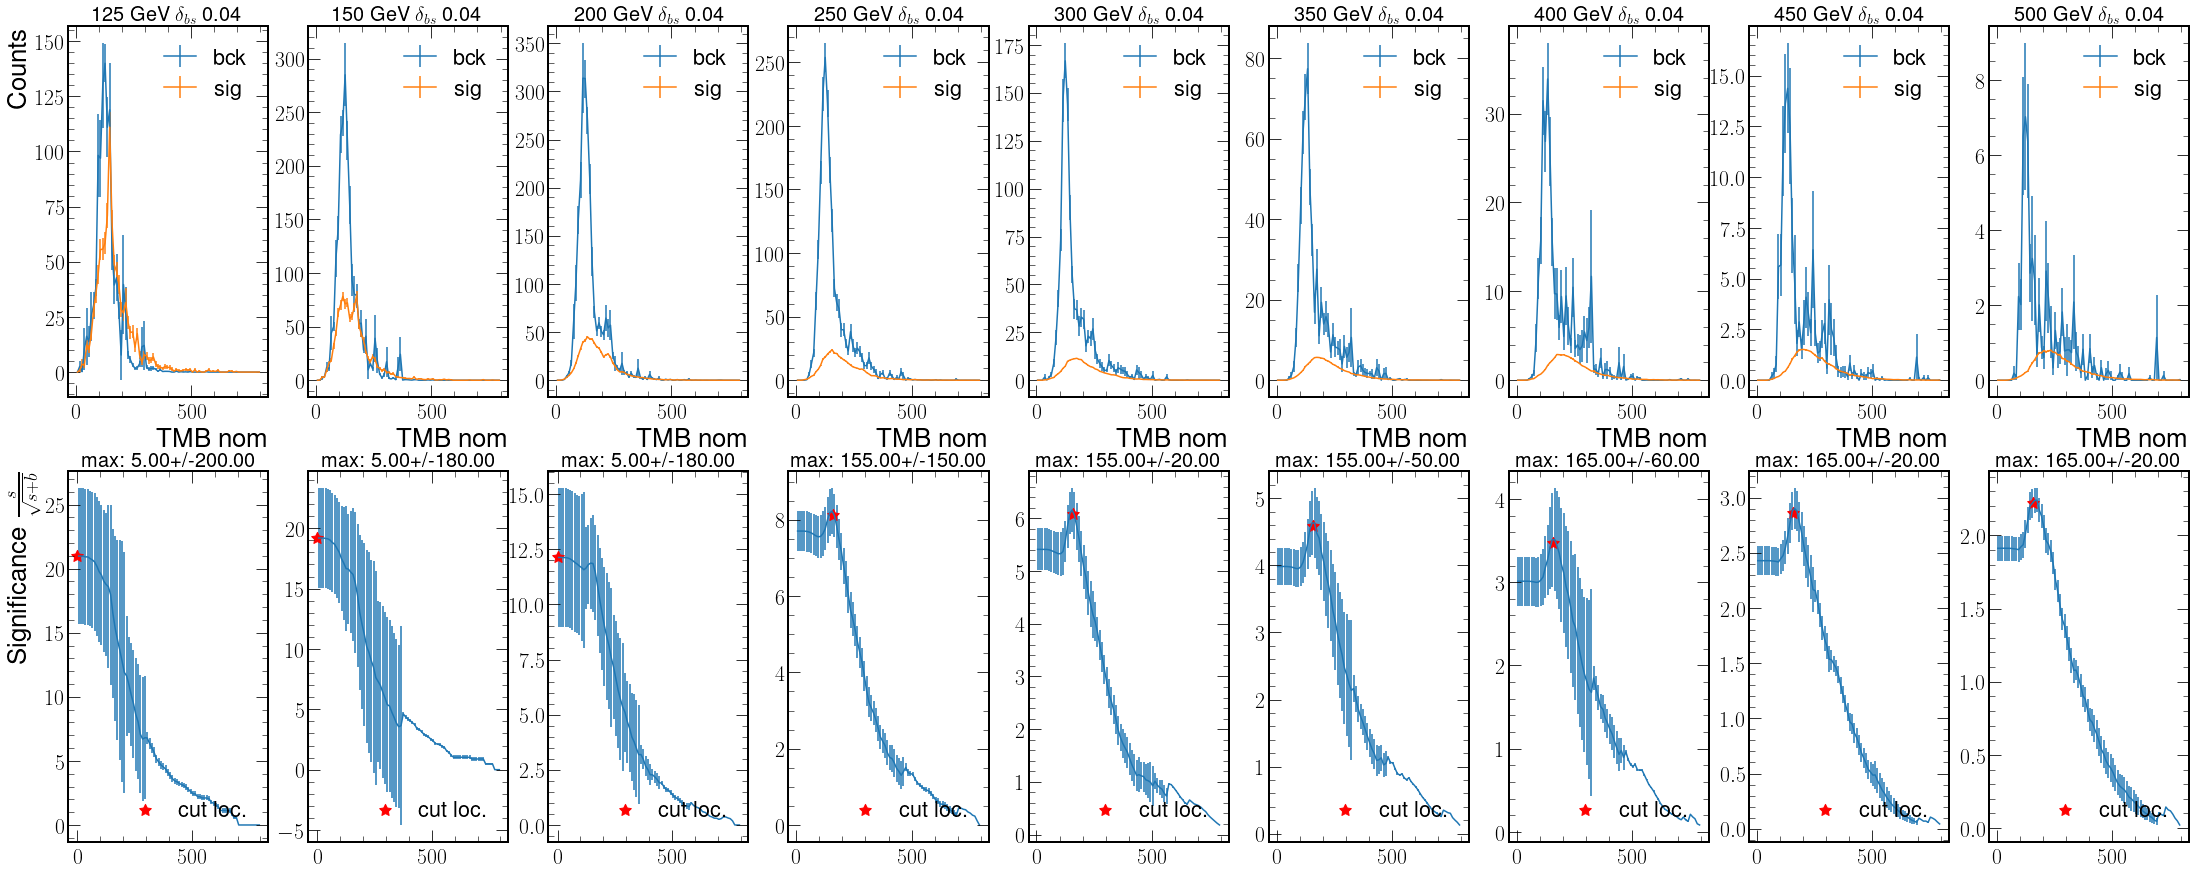

In [44]:
popt_TMB_1 = plot_opt_sig('TMB_nom',bff_dict, background_df,heaviside, filter_func=HTLT_f1_SR1_nom, postfix='_one_jet',direction=-1, p0=[300,100])
popt_TMB_2 = plot_opt_sig('TMB_nom',bff_dict, background_df,heaviside, filter_func=HTLT_f2_SR2_nom, postfix='_two_jet',direction=-1, p0=[225,100])

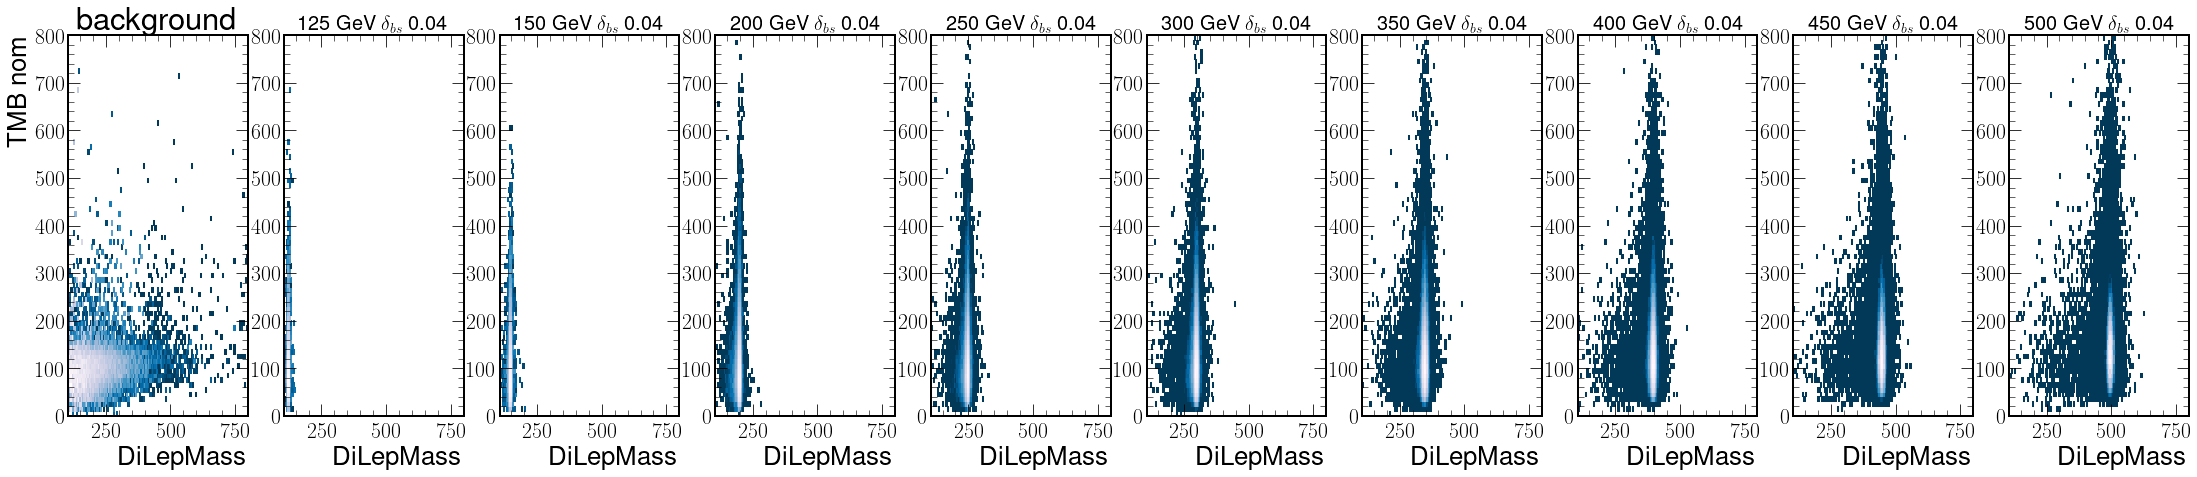

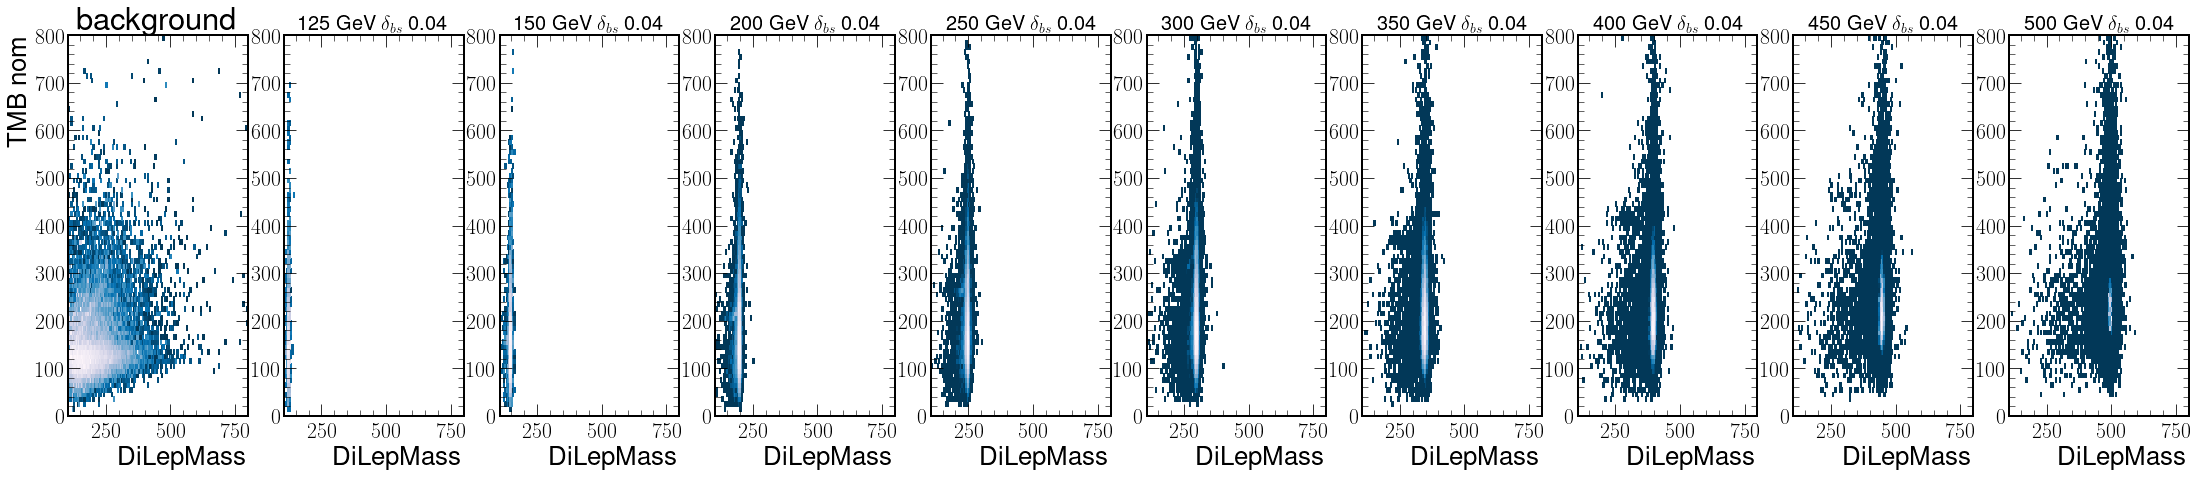

In [45]:
visualize_2d('TMB_nom', bff_dict, background_df, name='oneJet_nocut', filter_func=HTLT_f1_SR1_nom)
visualize_2d('TMB_nom', bff_dict, background_df, name='twoJet_nocut', filter_func=HTLT_f2_SR2_nom)

In [46]:
popt_TMB_2

array([225.        , 157.29574477])

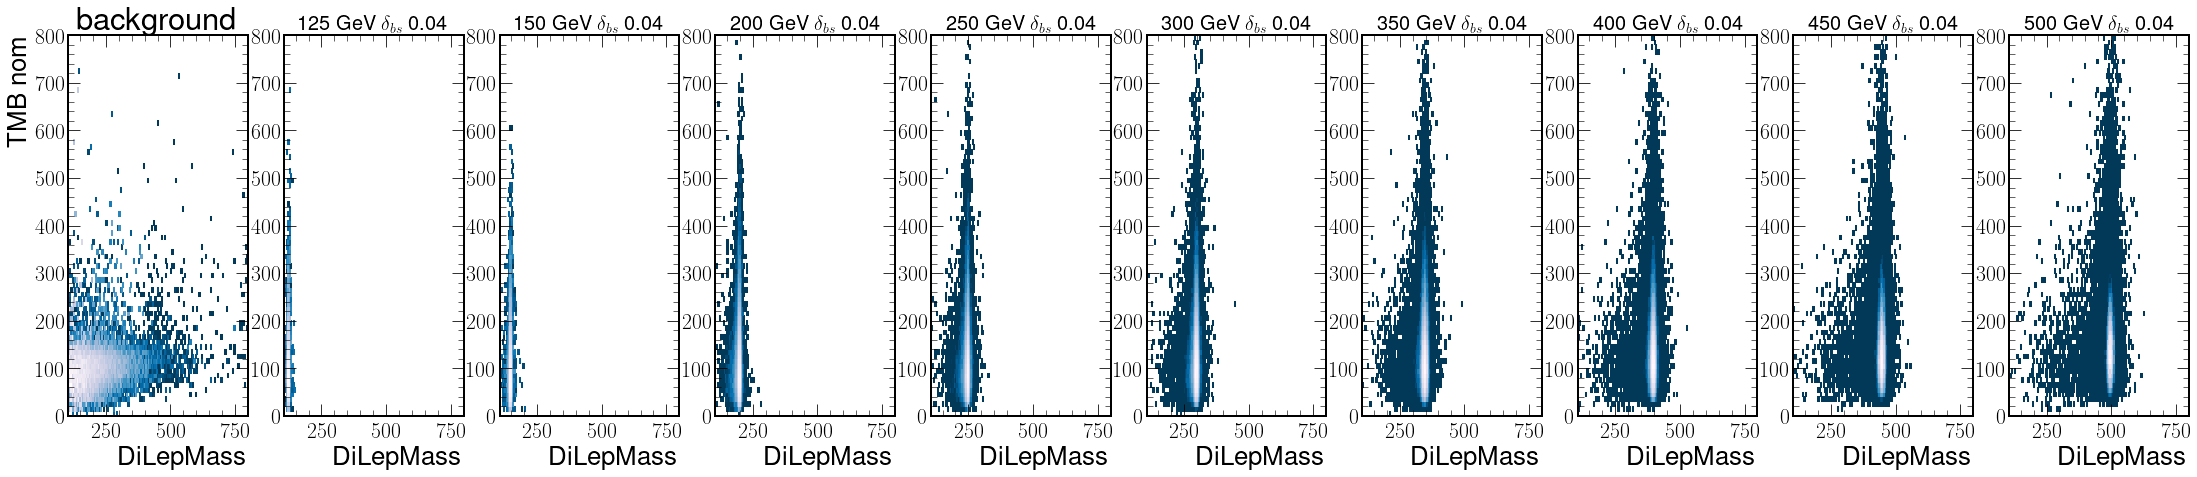

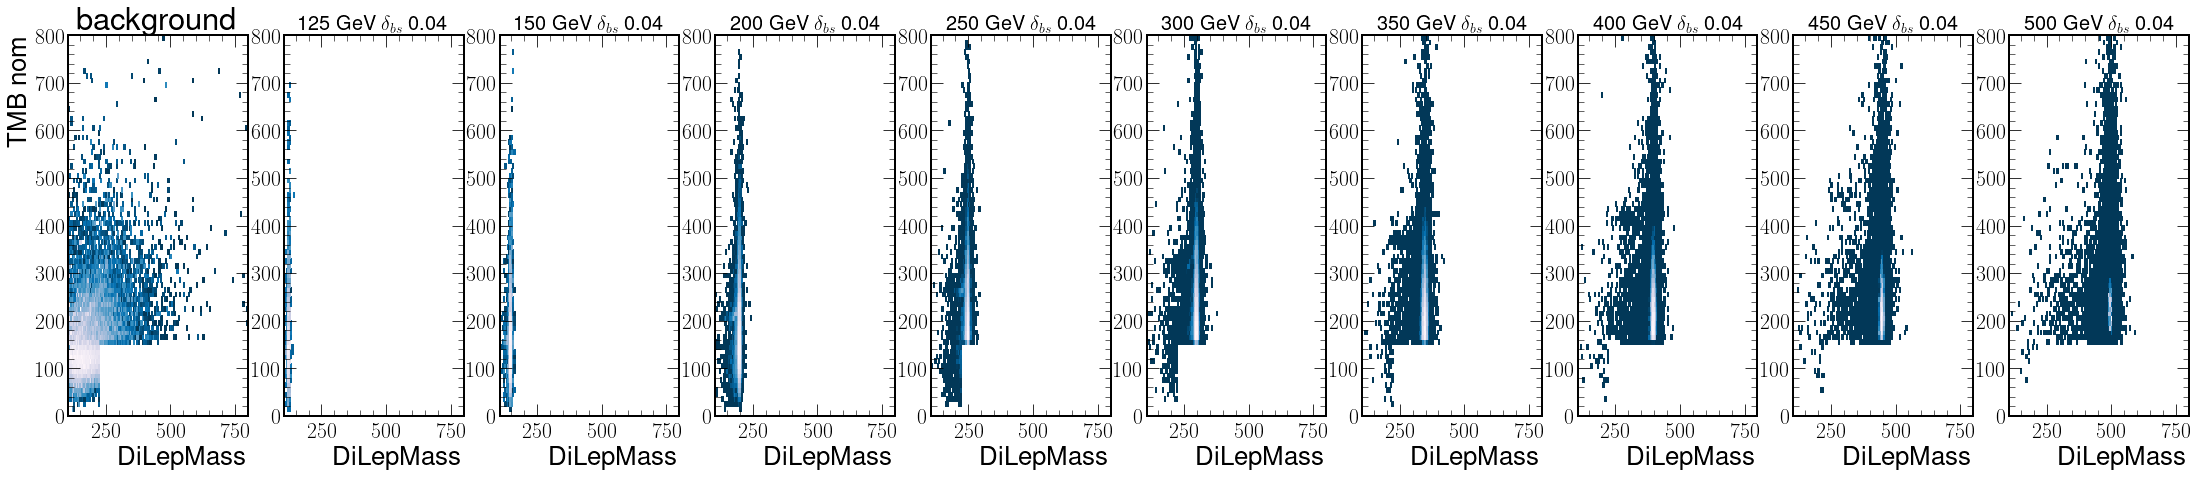

In [47]:
def TMB_filter(df, col, *popt):
    return heaviside(df.DiLepMass, *popt) < df[col]

TMB_filter1 = lambda df, col: TMB_filter(df, col, *popt_TMB_1)
TMB_filter2 = lambda df, col: TMB_filter(df, col, *popt_TMB_2)


TMB_f1_SR1_nom = lambda df: apply_multiple_filters(df, [df.SR1_nom, RelMET_filter1(df, 'RelMET_nom'), HTLT_filter1(df, 'HTLT_nom'), TMB_filter1(df, 'TMB_nom') ])
TMB_f2_SR2_nom = lambda df: apply_multiple_filters(df, [df.SR2_nom, RelMET_filter2(df, 'RelMET_nom'), HTLT_filter2(df, 'HTLT_nom'), TMB_filter2(df, 'TMB_nom')])


visualize_2d('TMB_nom', bff_dict, background_df, name='oneJet_cut', filter_func=TMB_f1_SR1_nom)
visualize_2d('TMB_nom', bff_dict, background_df, name='twoJet_cut', filter_func=TMB_f2_SR2_nom)

In [48]:
import dill as pickle

In [34]:
RelMET_filter1
RelMET_filter2
TMB_filter1
TMB_filter2
HTLT_filter1
HTLT_filter2

<function __main__.<lambda>(df, col)>

In [ ]:
def make_filter